# Artificial Neuron and Linear Models

Before addressing Deep Learning, it is essential to understand intelligence as the
ability to process information and make goal-oriented decisions. This perspective serves
as the foundation for **Artificial Intelligence (AI)**, understood as the development of
computational systems capable of emulating aspects of human behavior: learning from
experience, adapting to changes in the environment, and solving problems with minimal
human intervention.

Within AI, **Machine Learning** focuses on designing algorithms that learn from data.
Instead of explicitly defining decision rules, an **objective function** is specified
that quantifies model performance, and its parameters are optimized from labeled or
unlabeled examples. This approach, often described as _software 2.0_, largely replaces
manual programming with learning from data.

**Deep Learning** constitutes a specialization of machine learning based on **deep neural
networks**, capable of learning hierarchical representations of information and modeling
highly nonlinear relationships. Thanks to these properties, deep learning has achieved
outstanding results in computer vision, natural language processing, audio analysis, and,
in general, in the treatment of unstructured or high-dimensional data.

A key aspect in the recent advancement of Deep Learning is the so-called **scaling
laws**, which show how model performance improves systematically by increasing data
volume, computational capacity, and the number of parameters. This phenomenon has enabled
training large-scale models, such as **large language models (LLM)**, which exhibit
emergent capabilities of reasoning, transfer, and generalization beyond direct training
data. In parallel, **computational efficiency** is actively researched through lighter
architectures, specialized hardware (GPU, TPU), and low-level numerical optimizations.

Neural networks store knowledge in the form of **implicit memory** in their parameters
(weights and biases). This poses important challenges related to **generalization**
capacity, particularly the difference between behavior on data from the same distribution
as training (_in-distribution_) and data outside that distribution
(_out-of-distribution_). Likewise, in continuous learning contexts, problems such as
**catastrophic forgetting** appear, where the model loses performance on previously
learned tasks when incorporating new information. These issues have driven the
development of **foundation models**, trained generally on large data corpora and
subsequently adapted to specific tasks through _fine-tuning_ or _prompting_ techniques.

From a formal perspective, learning is modeled as an **optimization problem**: A **loss
function** is defined that measures prediction error, and the parameters that minimize an
aggregated cost function are sought. For this, gradient-based algorithms are used,
supported by **automatic differentiation**, which allows efficiently calculating
derivatives in neural networks with millions or billions of parameters. In this context,
data is transformed into continuous representations through **embeddings**, vectors in
high-dimensional spaces that capture semantic or structural relationships between
represented entities (words, images, users, products, etc.).

Deep Learning uses **specialized architectures** depending on data type and task: dense
networks (_fully connected_) for tabular or moderate-dimensional data, convolutional
networks (CNN) for spatial data and images, recurrent networks (RNN) and Transformers for
sequences, as well as multimodal models capable of integrating information from multiple
sources (text, image, audio, video). While many problems with **structured data** can be
effectively addressed with classical Machine Learning methods, **unstructured data**
usually requires deep networks that automatically learn complex and meaningful
representations from raw data.

In this conceptual framework, the **artificial neuron** emerges as a mathematical
abstraction inspired by the biological neuron. In simplified form, a neuron receives an
input vector $\mathbf{x}$, applies a linear combination parameterized by weights
$\mathbf{w}$ and a bias $b$, and finally passes the result through a nonlinear
**activation function** $\sigma$:

$$
z = \mathbf{w}^\top \mathbf{x} + b, \\ \hat{y} = \sigma(z).
$$

This structure constitutes the basic building block from which complete layers and deep
neural networks are built. On this basis, classical models such as **linear regression**
and **logistic regression** are developed, which can be interpreted as neurons with an
appropriate activation (linear or sigmoid).

## Linear and Logistic Regression

**Linear regression and logistic regression** provide the conceptual foundation of deep
learning by introducing the paradigm of **differentiable models**: models formed by
linear transformations and differentiable nonlinear functions, which allows adjusting
their parameters through gradient-based optimization algorithms. This principle is common
to all modern neural network architectures.

In both cases, the starting point is the calculation of a **logit** or linear combination
of input features:

$$
z = \mathbf{w}^\top \mathbf{x} + b,
$$

where $\mathbf{x} \in \mathbb{R}^n$ is the input vector (features),
$\mathbf{w} \in \mathbb{R}^n$ is the weight vector, and $b \in \mathbb{R}$ is the bias.
This value $z$ constitutes the output of the linear part of the neuron.

In a **linear model for regression**, the prediction is defined as

$$
\hat{y} = \mathbf{w}^\top \mathbf{x} + b,
$$

and can take unbounded real values. This type of model is used for **regression**, that
is, to predict continuous variables such as prices, temperatures, or physical quantities.

In **classification** problems, logits are transformed into probabilities through
activation functions. In **binary classification**, the **sigmoid function** is used:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \\ \hat{y} = \sigma(\mathbf{w}^\top \mathbf{x} + b),
$$

so that $\hat{y} \in (0, 1)$ can be interpreted as the probability of belonging to the
positive class. In **multiclass classification**, the **Softmax** function is used, which
from a vector of logits $\mathbf{z} \in \mathbb{R}^K$ produces a probability distribution
over $K$ classes:

$$
\mathrm{softmax}(\mathbf{z})_k = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}, \\ k = 1, \dots, K.
$$

More generally, a neural network can be described as a **composition of differentiable
layers**:

$$
f(\mathbf{x}) = f_L \circ f_{L-1} \circ \dots \circ f_1(\mathbf{x}), \\
f_\ell(\mathbf{x}) = \sigma_\ell(\mathbf{W}_\ell \mathbf{x} + \mathbf{b}_\ell),
$$

where each layer applies a linear transformation
$\mathbf{W}_\ell \mathbf{x} + \mathbf{b}_\ell$ followed by a nonlinear activation
function $\sigma_\ell$. This combination allows approximating highly complex and
nonlinear functions, endowing the model with great expressive capacity.

**Logistic regression** is a supervised method for **binary classification** that
explicitly models the probability of class membership. Given labeled data
$(\mathbf{x}^{(i)}, y^{(i)})$, assumed independent and identically distributed, the model
learns parameters $(\mathbf{w}, b)$ that maximize the probability of observed labels. In
applications such as image classification, inputs are represented as high-dimensional
vectors obtained by **flattening** the pixel matrices. For example, an RGB image of
$64 \times 64$ pixels is represented as a vector in $\mathbb{R}^{12288}$.

Learning is formalized through a **loss function** $\mathcal{L}(\hat{y}, y)$, which
measures the prediction error $\hat{y}$ against the true label $y$, and a **cost
function** defined as the average of losses over the training set:

$$
J(\mathbf{w}, b) = \frac{1}{M} \sum_{i=1}^{M} \mathcal{L}(\hat{y}^{(i)}, y^{(i)}),
$$

where $M$ is the number of examples. In logistic regression, the **logarithmic loss** or
**log-loss** is commonly used:

$$
\mathcal{L}(\hat{y}, y) = - \big( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \big),
$$

which provides well-behaved gradients and favors the convergence of optimization
algorithms. In regression problems, other losses are used, such as **mean squared error
(MSE)**:

$$
\mathrm{MSE} = \frac{1}{M} \sum_{i=1}^{M} \big(\hat{y}^{(i)} - y^{(i)}\big)^2,
$$

**MAE** (mean absolute error), or **Huber loss**, depending on the desired trade-off
between sensitivity to outliers and numerical stability.

It is important to emphasize that low cost on the training set does not guarantee good
performance on unseen data. **Overfitting** appears when the model memorizes training
examples instead of learning generalizable patterns. This phenomenon is favored by small
datasets, excessively complex architectures, or noisy data that poorly represents the
distribution of interest.

## Gradient Descent

**Gradient descent** is one of the fundamental algorithms for training machine learning
models. Its objective is to find parameter values that minimize a cost function, so that
model predictions fit observed data as well as possible.

In the case of logistic regression, the cost function $J(\mathbf{w}, b)$ is defined from
log-loss:

$$
J(\mathbf{w}, b) = \frac{1}{M} \sum_{i=1}^{M} \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{M} \sum_{i=1}^{M} \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big].
$$

To reduce the value of $J$, partial derivatives with respect to model parameters are
calculated. These derivatives define the **gradient**, that is, the direction in which
the cost function increases most rapidly. Since the objective is to minimize $J$, the
algorithm adjusts parameters in the opposite direction to the gradient:

$$
\frac{\partial J}{\partial \mathbf{w}} = \mathbf{d w} = \frac{1}{M} \sum_{i=1}^{M} (\hat{y}^{(i)} - y^{(i)}) \mathbf{x}^{(i)}, \\
\frac{\partial J}{\partial b} = d b = \frac{1}{M} \sum_{i=1}^{M} (\hat{y}^{(i)} - y^{(i)}).
$$

These terms indicate in what direction and with what magnitude $\mathbf{w}$ and $b$
should be modified to decrease error. The complete gradient descent procedure is
developed iteratively and can be described as:

1. **Parameter initialization**: Initial values are assigned to $\mathbf{w}$ and $b$,
   often small and random or zeros, depending on the problem.
2. **Forward propagation**: $\hat{y}$ is calculated from input data $X$ and the loss
   function $\mathcal{L}(\hat{y}, y)$ and cost function $J(\mathbf{w}, b)$ are evaluated.
3. **Backward propagation**: Partial derivatives $\mathbf{d w}$ and $d b$ are obtained
   through automatic differentiation or analytical derivation, which indicate how to
   adjust parameters.
4. **Parameter update**: Values of $\mathbf{w}$ and $b$ are updated according to the
   rule:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \mathbf{d w}, \\
b := b - \alpha \cdot d b,
$$

where $\alpha$ is the **learning rate**, a hyperparameter that controls step size at each
iteration. If $\alpha$ is too large, the algorithm may diverge; if it is too small,
convergence will be very slow.

This process is repeated until reaching an acceptable minimum of $J(\mathbf{w}, b)$,
which translates into more accurate predictions. In practice, gradient descent is
implemented in a **vectorized** manner, leveraging matrix operations on all examples (or
minibatches) in parallel, which simplifies code and allows exploiting GPU computational
capacity.

## Activation Functions

**Activation functions** introduce nonlinearity into neural networks and allow successive
layers to capture complex relationships between input variables. Without nonlinear
activation functions, a composition of linear layers would be equivalent to a single
linear transformation, severely limiting model capacity.

Below, several common activation functions are defined and their curves are shown through
simple Python code. NumPy is used for calculation and matplotlib for visualization.

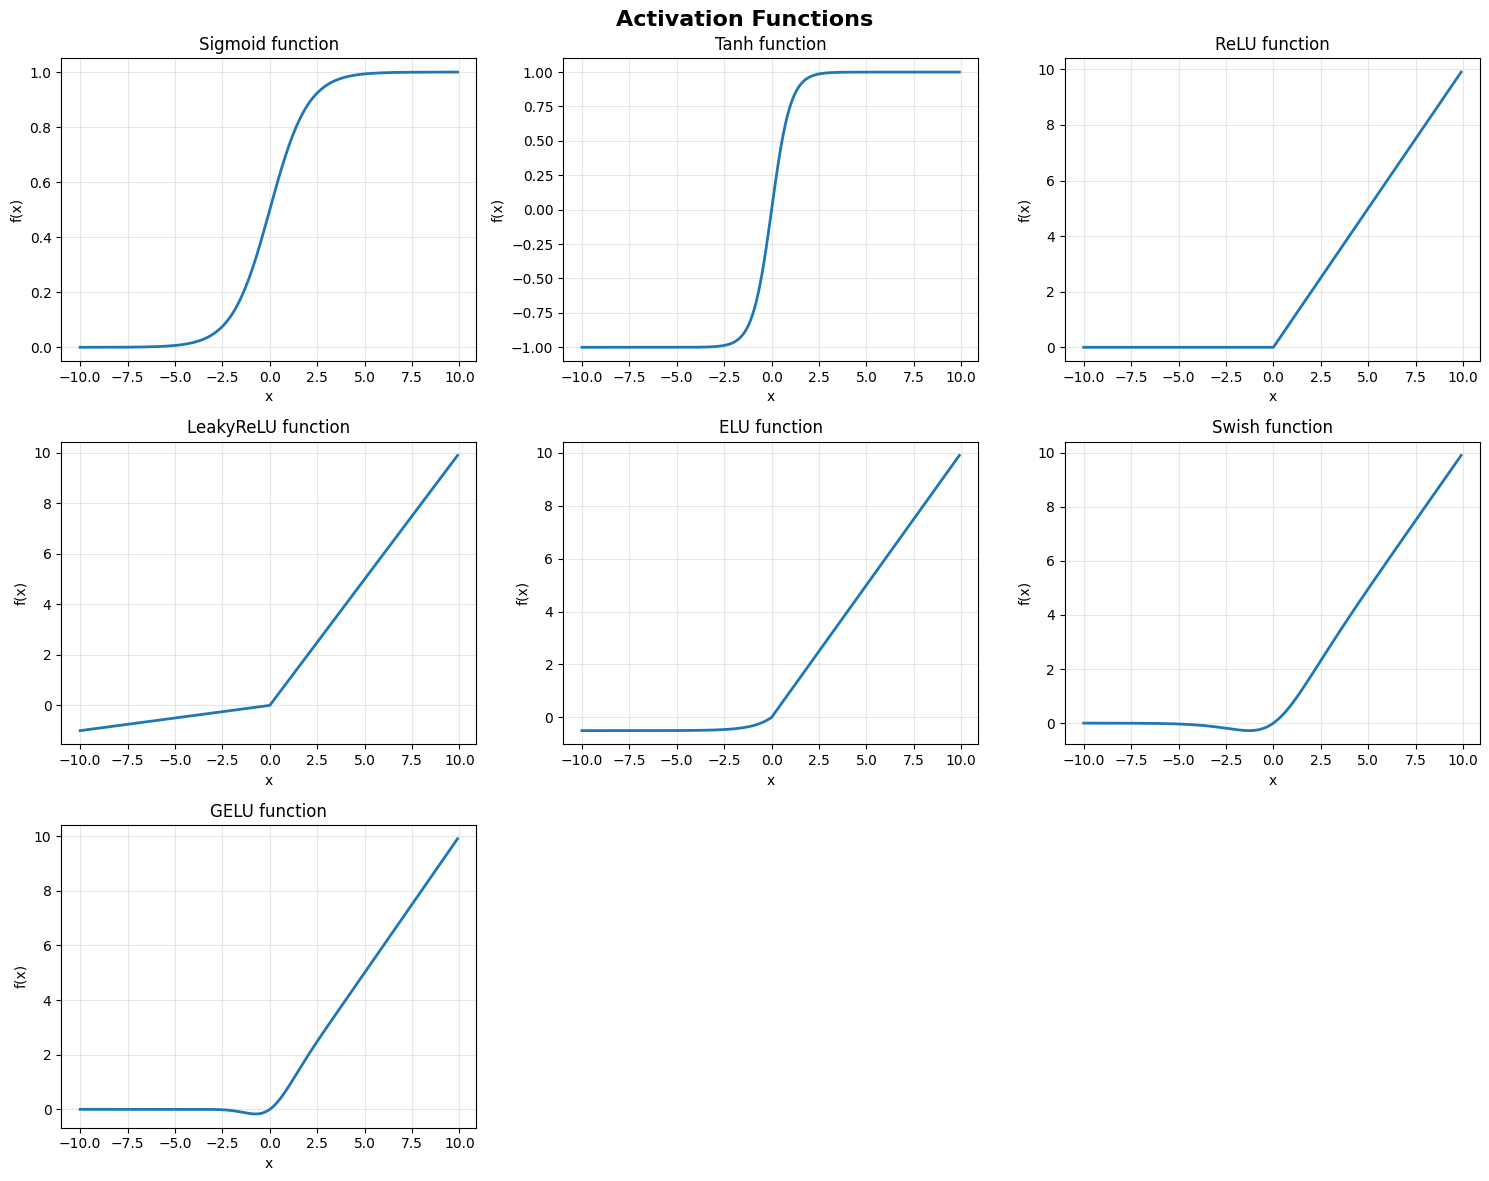

In [1]:
# Standard libraries
import math
from typing import Callable

# 3pps
# 3rd party packages
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(input: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input))


def tanh(input: np.ndarray) -> np.ndarray:
    return (np.exp(input) - np.exp(-input)) / (np.exp(input) + np.exp(-input))


def relu(input: np.ndarray) -> np.ndarray:
    return np.maximum(0, input)


def leaky_relu(input: np.ndarray, alpha: float = 0.1) -> np.ndarray:
    return np.maximum(alpha * input, input)


def elu(input: np.ndarray, alpha: float = 0.5) -> np.ndarray:
    return np.where(input < 0, alpha * (np.exp(input) - 1), input)


def swish(input: np.ndarray) -> np.ndarray:
    return input * sigmoid(input)


def gelu(input: np.ndarray) -> np.ndarray:
    return (
        0.5 * input * (1 + tanh(math.sqrt(2 / math.pi) * (input + 0.044715 * input**3)))
    )


steps = np.arange(-10, 10, 0.1)

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Activation Functions", fontsize=16, fontweight="bold")

# Flatten axes array for easier iteration
axes = axes.flatten()

# List of functions and their names
functions = [
    ("Sigmoid", sigmoid),
    ("Tanh", tanh),
    ("ReLU", relu),
    ("LeakyReLU", leaky_relu),
    ("ELU", elu),
    ("Swish", swish),
    ("GELU", gelu),
]

# Plot each function
for idx, (name, func) in enumerate(functions):
    axes[idx].plot(steps, func(steps), linewidth=2)
    axes[idx].set_title(f"{name} function")
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("f(x)")

# Hide unused subplots
for idx in range(len(functions), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

Each of these functions has particular properties regarding saturation, derivatives,
symmetry, and numerical behavior:

- **Sigmoid**: Compresses the input value to the interval $(0, 1)$. Suitable for
  probabilistic outputs in binary classification, although it can suffer from gradient
  saturation problems.
- **Tanh**: Similar to sigmoid, but centered at zero, with range $(-1, 1)$. Usually
  provides better gradients than pure sigmoid in intermediate layers.
- **ReLU (Rectified Linear Unit)**: Defines $\mathrm{ReLU}(x) = \max(0, x)$. It is one of
  the most used activations due to its simplicity and good behavior in deep networks.
- **Leaky ReLU** and **ELU**: Introduce a small slope in the negative part to avoid
  completely inactive neurons and improve gradient propagation.
- **Swish** and **GELU**: Are smooth and nonlinear modern functions, used in recent
  architectures (for example, Transformers), which often offer empirical performance
  improvements over ReLU in certain contexts.

These functions are implemented in a differentiable way, which allows PyTorch and other
libraries to automatically calculate their gradients during the training phase.

## Binary Classification Example with a Neural Network

To illustrate how all the previous elements combine—neurons, activation functions, loss
functions, gradient descent, and automatic differentiation—a **binary classification**
example with PyTorch on a synthetic dataset is presented.

In this example, data is generated using the `make_circles` function from `scikit-learn`,
which produces two classes in the shape of concentric circles, a nonlinearly separable
problem. Next, a simple neural network is defined, trained using stochastic gradient
descent, and its performance is analyzed.

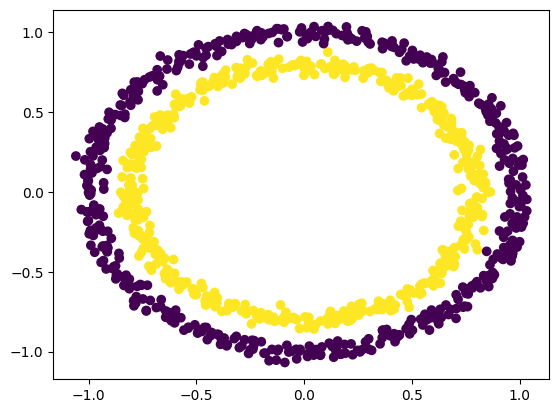

tensor(0.) tensor(1.) torch.float32
tensor(0.) tensor(1.) torch.float32


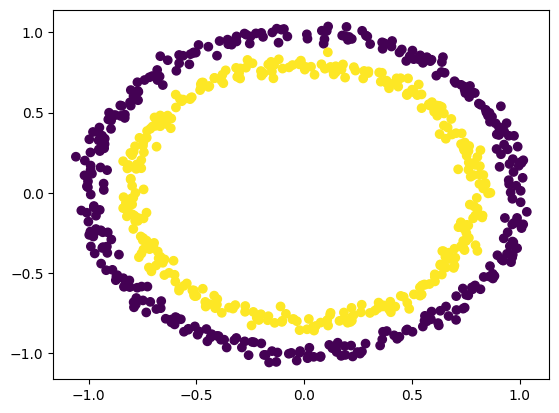

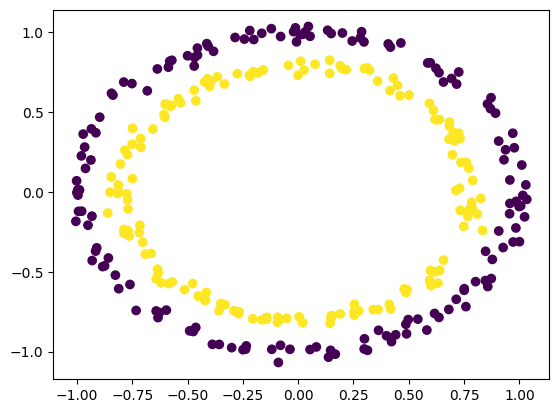

In [2]:
# Standard libraries
import math

# 3pps
# 3rd party packages
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn


class BinaryClassifier(nn.Module):
    def __init__(self, num_classes: int) -> None:
        super().__init__()
        self.num_classes = num_classes

        # Sequential model: hidden layer + GELU activation + output layer + sigmoid
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.GELU(),
            nn.Linear(16, 1),
            nn.Sigmoid(),
        )

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:
        return self.model(input_tensor)


# Generate circle-shaped data
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
X.shape, y.shape

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Define model, loss function, and optimizer
model = BinaryClassifier(num_classes=2)
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=3e-2)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print(y_train.min(), y_train.max(), y_train.dtype)
print(y_test.min(), y_test.max(), y_test.dtype)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

A training loop by epochs is defined, using minibatches and recording both loss and
accuracy on training and test sets:

In [3]:
num_epochs = 20
batch_size = 32
num_batches = math.ceil(len(X_train) / batch_size)
num_batches_test = math.ceil(len(X_test) / batch_size)

plot_loss_train = []
plot_loss_test = []
plot_acc_train = []
plot_acc_test = []

for epoch in range(num_epochs):
    loss_epoch_train = []
    loss_epoch_test = []
    accuracy_train = []
    accuracy_test = []

    # Training phase
    model.train()
    for i in range(num_batches):
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        y_batch = y_train[i * batch_size : (i + 1) * batch_size].view(-1, 1)

        optimizer.zero_grad()
        predictions = model(X_batch)
        loss = loss_function(predictions, y_batch)
        loss.backward()
        optimizer.step()

        loss_epoch_train.append(loss.item())
        pred_labels = (predictions >= 0.5).float()
        acc = (pred_labels == y_batch).float().mean().item() * 100
        accuracy_train.append(acc)

    # Evaluation phase
    model.eval()
    with torch.inference_mode():
        for i in range(num_batches_test):
            X_test_batch = X_test[i * batch_size : (i + 1) * batch_size]
            y_test_batch = y_test[i * batch_size : (i + 1) * batch_size].view(-1, 1)

            predictions_inference = model(X_test_batch)
            loss_test = loss_function(predictions_inference, y_test_batch)
            loss_epoch_test.append(loss_test.item())

            pred_labels_test = (predictions_inference >= 0.5).float()
            acc_test = (pred_labels_test == y_test_batch).float().mean().item() * 100
            accuracy_test.append(acc_test)

    # Epoch averages
    train_loss_mean = np.mean(loss_epoch_train)
    test_loss_mean = np.mean(loss_epoch_test)
    train_acc_mean = np.mean(accuracy_train)
    test_acc_mean = np.mean(accuracy_test)

    print(
        f"Epoch: {epoch+1}, "
        f"Train Loss: {train_loss_mean:.4f}, "
        f"Test Loss: {test_loss_mean:.4f}, "
        f"Train Acc: {train_acc_mean:.2f}%, "
        f"Test Acc: {test_acc_mean:.2f}%"
    )

    plot_loss_train.append(train_loss_mean)
    plot_loss_test.append(test_loss_mean)
    plot_acc_train.append(train_acc_mean)
    plot_acc_test.append(test_acc_mean)

Epoch: 1, Train Loss: 0.6943, Test Loss: 0.6851, Train Acc: 50.69%, Test Acc: 50.73%
Epoch: 2, Train Loss: 0.6731, Test Loss: 0.6447, Train Acc: 56.31%, Test Acc: 58.54%
Epoch: 3, Train Loss: 0.6214, Test Loss: 0.5716, Train Acc: 65.89%, Test Acc: 75.73%
Epoch: 4, Train Loss: 0.5355, Test Loss: 0.4763, Train Acc: 87.07%, Test Acc: 88.12%
Epoch: 5, Train Loss: 0.4395, Test Loss: 0.3751, Train Acc: 90.50%, Test Acc: 93.12%
Epoch: 6, Train Loss: 0.3416, Test Loss: 0.2883, Train Acc: 95.88%, Test Acc: 97.81%
Epoch: 7, Train Loss: 0.2636, Test Loss: 0.2237, Train Acc: 98.15%, Test Acc: 98.44%
Epoch: 8, Train Loss: 0.2040, Test Loss: 0.1692, Train Acc: 99.57%, Test Acc: 99.69%
Epoch: 9, Train Loss: 0.1595, Test Loss: 0.1312, Train Acc: 99.86%, Test Acc: 99.69%
Epoch: 10, Train Loss: 0.1277, Test Loss: 0.1052, Train Acc: 99.86%, Test Acc: 99.69%
Epoch: 11, Train Loss: 0.1045, Test Loss: 0.0869, Train Acc: 99.86%, Test Acc: 99.69%
Epoch: 12, Train Loss: 0.0871, Test Loss: 0.0735, Train Acc: 99

After training, loss and accuracy curves throughout epochs are plotted and the model's
ability to separate classes on the test set is visualized:

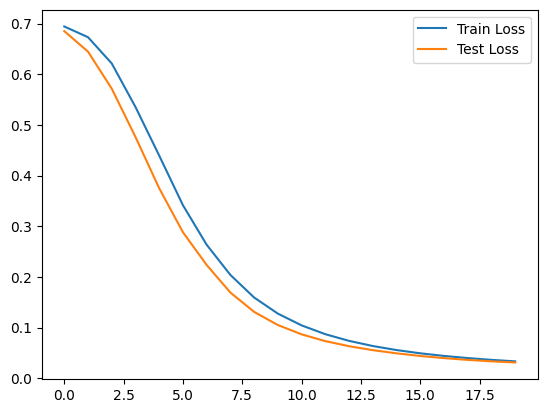

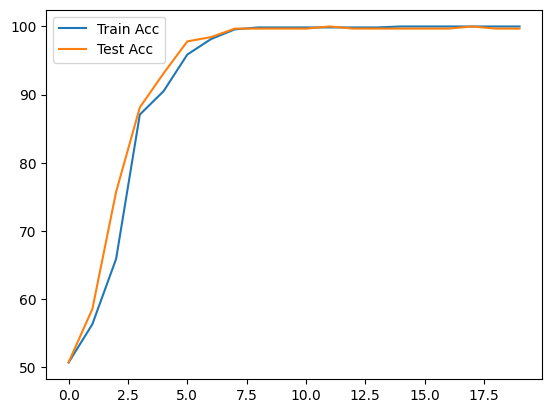

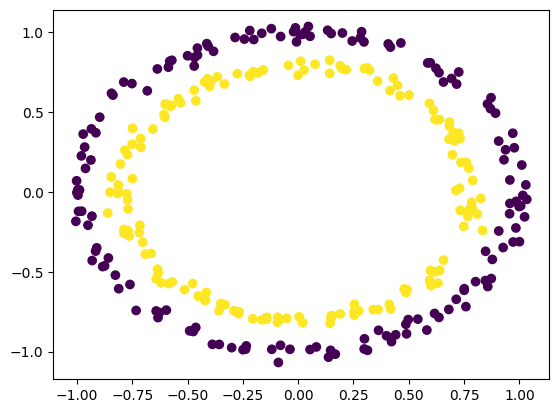

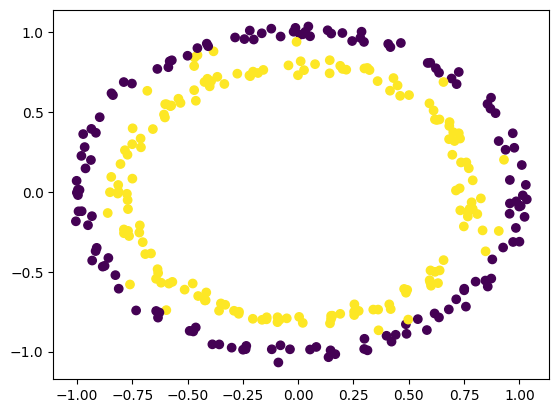

In [4]:
# Loss evolution
plt.plot(range(num_epochs), plot_loss_train, label="Train Loss")
plt.plot(range(num_epochs), plot_loss_test, label="Test Loss")
plt.legend()
plt.show()

# Accuracy evolution
plt.plot(range(num_epochs), plot_acc_train, label="Train Acc")
plt.plot(range(num_epochs), plot_acc_test, label="Test Acc")
plt.legend()
plt.show()

# Original test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

# Model predictions on test set
with torch.inference_mode():
    predictions = model(X_test)

predictions = np.where(predictions.numpy() >= 1e-1, 1, 0)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.show()